# Setup

In [125]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl

Load our data

In [126]:
# SPX historical market data from Yahoo Finance
# Source:  https://finance.yahoo.com/quote/%5ESPX/history?period1=-1325635200&period2=1710633600&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true
SPX_historical = pd.read_csv('SPX_historical.csv')
SPX_historical

,Date,Open,High,Low,Close,Adj Close,Volume
0,1927-12-30,17.660000,17.660000,17.660000,17.660000,17.660000,0
1,1928-01-03,17.760000,17.760000,17.760000,17.760000,17.760000,0
2,1928-01-04,17.719999,17.719999,17.719999,17.719999,17.719999,0
3,1928-01-05,17.549999,17.549999,17.549999,17.549999,17.549999,0
4,1928-01-06,17.660000,17.660000,17.660000,17.660000,17.660000,0
...,...,...,...,...,...,...,...
24162,2024-03-11,5111.959961,5124.660156,5091.140137,5117.939941,5117.939941,3896430000
24163,2024-03-12,5134.299805,5179.870117,5114.479980,5175.270020,5175.270020,4080510000
24164,2024-03-13,5173.490234,5179.140137,5151.879883,5165.310059,5165.310059,4282890000
24165,2024-03-14,5175.140137,5176.850098,5123.299805,5150.479980,5150.479980,4687970000


# Initial EDA

In [127]:
print("Object type: ", type(SPX_historical))
print("Dimensions: ", SPX_historical.shape)
print("Date range: ", SPX_historical["Date"].min(), "to", SPX_historical["Date"].max())
print("Index values range: ", SPX_historical["High"].max(), "-", SPX_historical["Low"].min())
print("Missing values: ", SPX_historical.isna().sum().sum())

Object type:  <class 'pandas.core.frame.DataFrame'>
Dimensions:  (24167, 7)
Date range:  1927-12-30 to 2024-03-15
Index values range:  5189.259766 - 4.4
Missing values:  0


We have nearly a century of data, however, the extreme values range, and changes in historic changes in economic structures and measurement methods leads me to believe we should investigate this data further. It also appears much of the data for the earliest dates contains the same values for Open, High, Low, and Close. While it might be possible to observe some kind of patterns in day-to-day change, I fear this total colinearity will weaken any model that is looking at *all* of these variables.

In [128]:
Same = SPX_historical.loc[SPX_historical["Open"] != SPX_historical["Close"]]
Same

,Date,Open,High,Low,Close,Adj Close,Volume
8509,1962-01-02,0.000000,71.959999,70.709999,70.959999,70.959999,3120000
8510,1962-01-03,0.000000,71.480003,70.379997,71.129997,71.129997,3590000
8511,1962-01-04,0.000000,71.620003,70.449997,70.639999,70.639999,4450000
8512,1962-01-05,0.000000,70.839996,69.349998,69.660004,69.660004,4630000
8513,1962-01-08,0.000000,69.839996,68.169998,69.120003,69.120003,4620000
...,...,...,...,...,...,...,...
24162,2024-03-11,5111.959961,5124.660156,5091.140137,5117.939941,5117.939941,3896430000
24163,2024-03-12,5134.299805,5179.870117,5114.479980,5175.270020,5175.270020,4080510000
24164,2024-03-13,5173.490234,5179.140137,5151.879883,5165.310059,5165.310059,4282890000
24165,2024-03-14,5175.140137,5176.850098,5123.299805,5150.479980,5150.479980,4687970000


Further investigation reveals that different High, Low, Open, and Close values were not recorded for years prior to 1961. I also want to investigate 'Open' values.

In [129]:
OpenZero = SPX_historical.loc[SPX_historical["Open"] == 0.0]
OpenZero

,Date,Open,High,Low,Close,Adj Close,Volume
8509,1962-01-02,0.0,71.959999,70.709999,70.959999,70.959999,3120000
8510,1962-01-03,0.0,71.480003,70.379997,71.129997,71.129997,3590000
8511,1962-01-04,0.0,71.620003,70.449997,70.639999,70.639999,4450000
8512,1962-01-05,0.0,70.839996,69.349998,69.660004,69.660004,4630000
8513,1962-01-08,0.0,69.839996,68.169998,69.120003,69.120003,4620000
...,...,...,...,...,...,...,...
13597,1982-04-13,0.0,117.120003,115.160004,115.989998,115.989998,48660000
13598,1982-04-14,0.0,116.690002,114.800003,115.830002,115.830002,45150000
13599,1982-04-15,0.0,116.860001,115.019997,116.349998,116.349998,45700000
13600,1982-04-16,0.0,117.699997,115.680000,116.809998,116.809998,55890000


"Open" values are consistently zero from 1962 through 1982. Given all of the discrepancies above *and* the beginning of financialization in the 1980s, which contributed to significant changes in the ways the market might behave, I opt to remove all rows prior to 1983.

In [130]:
SPX_historical = SPX_historical.iloc[13602:].reset_index(drop=True)
SPX_historical

,Date,Open,High,Low,Close,Adj Close,Volume
0,1982-04-20,115.800003,117.139999,114.830002,115.440002,115.440002,54610000
1,1982-04-21,115.480003,115.870003,115.300003,115.720001,115.720001,57820000
2,1982-04-22,115.720001,117.250000,115.720001,117.190002,117.190002,64470000
3,1982-04-23,118.019997,118.639999,117.190002,118.639999,118.639999,71840000
4,1982-04-26,118.940002,119.330002,118.250000,119.260002,119.260002,60500000
...,...,...,...,...,...,...,...
10560,2024-03-11,5111.959961,5124.660156,5091.140137,5117.939941,5117.939941,3896430000
10561,2024-03-12,5134.299805,5179.870117,5114.479980,5175.270020,5175.270020,4080510000
10562,2024-03-13,5173.490234,5179.140137,5151.879883,5165.310059,5165.310059,4282890000
10563,2024-03-14,5175.140137,5176.850098,5123.299805,5150.479980,5150.479980,4687970000


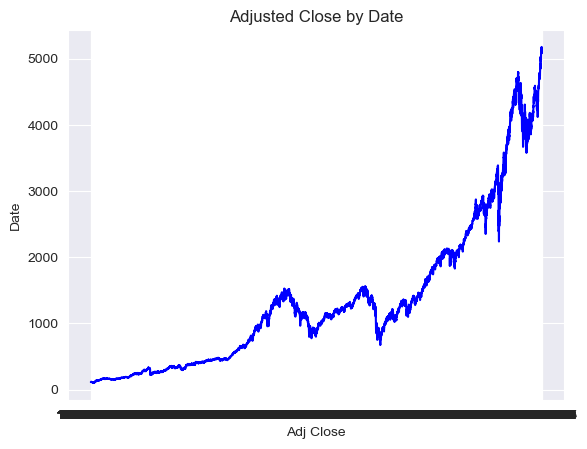

In [131]:
X = SPX_historical["Date"]
Y = SPX_historical["Adj Close"]
plt.figure()
plt.plot(X, Y, marker='', color='blue')
plt.title('Adjusted Close by Date')
plt.xlabel('Adj Close')
plt.ylabel('Date')

plt.grid(True)
plt.show()

# Imputation & feature creation

I start by creating a day average variable. This information is sometimes used for market prediction, and I aim to experiment incorporating it into my model.

In [103]:
SPX_historical.loc[:,"DayAvg"] = (SPX_historical["High"] + SPX_historical["Low"])/2
SPX_historical

,Date,Open,High,Low,Close,Adj Close,Volume,DayAvg
13602,1982-04-20,115.800003,117.139999,114.830002,115.440002,115.440002,54610000,115.985000
13603,1982-04-21,115.480003,115.870003,115.300003,115.720001,115.720001,57820000,115.585003
13604,1982-04-22,115.720001,117.250000,115.720001,117.190002,117.190002,64470000,116.485000
13605,1982-04-23,118.019997,118.639999,117.190002,118.639999,118.639999,71840000,117.915001
13606,1982-04-26,118.940002,119.330002,118.250000,119.260002,119.260002,60500000,118.790001
...,...,...,...,...,...,...,...,...
24162,2024-03-11,5111.959961,5124.660156,5091.140137,5117.939941,5117.939941,3896430000,5107.900147
24163,2024-03-12,5134.299805,5179.870117,5114.479980,5175.270020,5175.270020,4080510000,5147.175049
24164,2024-03-13,5173.490234,5179.140137,5151.879883,5165.310059,5165.310059,4282890000,5165.510010
24165,2024-03-14,5175.140137,5176.850098,5123.299805,5150.479980,5150.479980,4687970000,5150.074951


Now, I need to create my target variable. It will be a simple binary encoding of whether the market trended upward or downward between open and close on a given day.

1 = Up

0 = Down

In [ ]:
SPX_historical["Movement"] = 